In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx

In [3]:
players = {}
ids = {}
teams = {}
with open("data/players.json") as f:
    data = json.load(f)

for row in data:
    if (row['lastName'] == ""):
        name = row["firstName"]
    else:
        name = row['lastName']+", "+row["firstName"]
    iden = str(row['playerId'])
    players[name] = iden
    ids[iden] = name
    teams[iden] = row['teamId']

franchises = {"Brooklyn Nets": 1610612751, "Minnesota Timberwolves":1610612750 ,"Golden State Warriors": 1610612744, 
              "Los Angeles Clippers": 1610612746, "Los Angeles Lakers": 1610612747, "Washington Wizards": 1610612764, 
              "Milwaukee Bucks": 1610612749, "Toronto Raptors": 1610612761, "Philadelphia 76ers": 1610612755 , 
              "Boston Celtics":1610612738 ,  "Orlando Magic": 1610612753, "Atlanta Hawks":1610612737,
              "Houston Rockets": 1610612745 , "San Antontio Spurs":  1610612759, "New Orleans Pelicans": 1610612740, 
              "Pheonix Suns": 1610612756, "Sacramento Kings": 1610612758, "Portland Trailblazers": 1610612757, 
              "Denver Nuggets":1610612743 , "Memphis Grizzlies": 1610612763, "Miami Heat":1610612748, 
              "Cleveland Cavaliers": 1610612739, "Charlotte Hornets":1610612766, "Chicago Bulls": 1610612741, 
              "New York Knicks": 1610612752, "Indiana Pacers":1610612754 , "Utah Jazz":1610612762 , 
              "Detroit Pistons": 1610612765, "Dallas Mavericks": 1610612742, "Oklahoma City Thunder": 1610612760,  
             }

In [4]:
def passes_player(player_id):   
    iden = player_id
    name = ids[iden]

    fname = "data/"+players[name]+"-passing.json"

    with open(fname, "r") as f:
        data = json.load(f)

    passes = []
    for key in data:
        passes.append(data[key][0])
            
    return passes

def assists_player(player_id):   
    iden = player_id
    name = ids[iden]

    fname = "data/"+players[name]+"-passing.json"

    with open(fname, "r") as f:
        data = json.load(f)

    passes = []
    for key in data:
        passes.append(data[key][1])
            
    return passes


def passes_player_win_loss(player_id):   
    iden = player_id
    name = ids[iden]

    fname_w = "data/"+players[name]+"-passing-win.json"
    fname_l = "data/"+players[name]+"-passing-loss.json"

    with open(fname_w, "r") as f:
        data_w = json.load(f)
    with open(fname_l, "r") as f:
        data_l = json.load(f)
        
    diffs = []
    for key in data_w:
        if (key in data_l and data_w[key][0] > 5 and data_l[key][0] > 5):
            diffs.append(data_w[key][0] - data_l[key][0])
            
    return diffs

def assists_player_win_loss(player_id):   
    iden = player_id
    name = ids[iden]

    fname_w = "data/"+players[name]+"-passing-win.json"
    fname_l = "data/"+players[name]+"-passing-loss.json"

    with open(fname_w, "r") as f:
        data_w = json.load(f)
    with open(fname_l, "r") as f:
        data_l = json.load(f)
        
    diffs = []
    for key in data_w:
        if (key in data_l and data_w[key][1] > 0.5 and data_l[key][1] > 0.5):
            diffs.append(data_w[key][1] - data_l[key][1])
            
    return diffs

0.11580706781279847


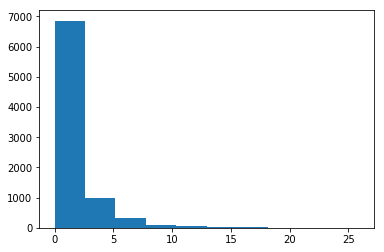

In [5]:
passes = []
for player in players:
    passes.extend(passes_player(players[player]))
plt.hist(passes)

diff_g = len([l for l in passes if l > 3.5])
print(diff_g/len(passes))

0.13670009551098378


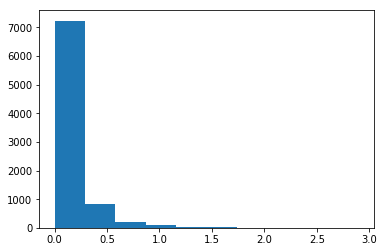

In [7]:
assists = []
for player in players:
    assists.extend(assists_player(players[player]))
plt.hist(assists)

diff_g = len([l for l in assists if l > 0.2])
print(diff_g/len(assists))

433
217


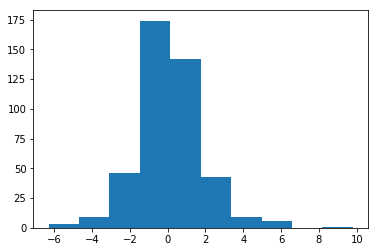

In [120]:
diffs = []
for player in players:
    diffs.extend(passes_player_win_loss(players[player]))
plt.hist(diffs)
print(len(diffs))
diff_g = len([l for l in diffs if l > 0])
print(diff_g)

211
125


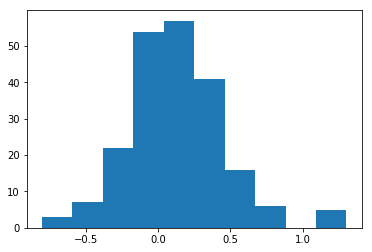

In [116]:
diffs = []
for player in players:
    diffs.extend(assists_player_win_loss(players[player]))
plt.hist(diffs)
print(len(diffs))
diff_g = len([l for l in diffs if l > 0])
print(diff_g)